# Install necessary libraries

In [ ]:
!pip install contractions
!pip install wordcloud
!pip install xgboost
import contractions
import pandas as pd
import re
import matplotlib.pyplot as plt
import spacy
import string
import seaborn as sns
import unicodedata
from bs4 import BeautifulSoup
from google.colab import drive
drive.mount('/content/drive')
import unicodedata
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics
import pickle as pk


Mounted at /content/drive


[nltk_data] Downloading package wordnet to /root/nltk_data...


# Loading dataset from google drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nlp/IMDB Dataset.csv')

df.shape

df.info()

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have

# remove duplicate

In [ ]:
# Check if there are aduplicated values in the data & drop it if found :
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  418
Number of duplicates of cleaning it ----->>>  0


In [ ]:
df_backup = df.copy()
df.to_csv('/content/drive/MyDrive/nlp/IMDB Dataset_vf0.csv', sep='\t', encoding='utf-8', index=False, header=True)
df = df.drop('sentiment', axis=1)

# Cleaning dataset

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df.review = df['review'].apply(remove_emoji)

def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()
df.review = df['review'].apply(remove_html_tags)


def to_lowercase(text):
    return text.lower()
df.review = df['review'].apply(to_lowercase)


def standardize_accented_chars(text):
 return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
df.review = df['review'].apply(standardize_accented_chars)


def expand_contractions(text):
    expanded_words = []
    for word in text.split():
       expanded_words.append(contractions.fix(word))
    return ' '.join(expanded_words)
df.review = df['review'].apply(expand_contractions)


def remove_url(text):
 return re.sub(r'https?:\S*', '', text)
df.review = df['review'].apply(remove_url)



def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)

df.review = df['review'].apply(remove_mentions_and_tags)


def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
    return re.sub(pat, '', text)
df.review = df['review'].apply(remove_special_characters)


def remove_numbers(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]'
    return re.sub(pattern, '', text)
df.review = df['review'].apply(remove_numbers)


def remove_punctuation(text):
    return ''.join([c for c in text if c not in string.punctuation])
df.review = df['review'].apply(remove_punctuation)


def data_processing(text):
  return re.sub('<br />', '', text)
df.review = df['review'].apply(data_processing)

df.review = df.review.replace(r'\s+', ' ', regex=True)




<ipython-input-6-dd5c6390f40a>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
print(df)

                                                  review
0      one of the other reviewers has mentioned that ...
1      a wonderful little production the filming tech...
2      i thought this was a wonderful way to spend ti...
3      basically there is a family where a little boy...
4      petter matteis love in the time of money is a ...
...                                                  ...
49995  i thought this movie did a down right good job...
49996  bad plot bad dialogue bad acting idiotic direc...
49997  i am a catholic taught in parochial elementary...
49998  i am going to have to disagree with the previo...
49999  no one expects the star trek movies to be high...

[49582 rows x 1 columns]


In [ ]:
df.to_csv('/content/drive/MyDrive/nlp/IMDB Dataset_vf1.csv', sep='\t', encoding='utf-8', index=False, header=True)

In [ ]:

def remove_stopwords(text):
    filtered_sentence =[]
    doc=nlp(text)
    for token in doc:
        if token.is_stop == False:
          filtered_sentence.append(token.text)
    return ' ' .join(filtered_sentence)
df.review = df['review'].apply(remove_stopwords)

In [ ]:
def lemmatize(text):
   doc = nlp(text)
   lemmatized_text = []
   for token in doc:
     lemmatized_text.append(token.lemma_)
   return ' '.join(lemmatized_text)
df['review'] = df.review.apply(lemmatize)




In [ ]:
df.to_csv('/content/drive/MyDrive/nlp/IMDB Dataset_vf2.csv', sep='\t', encoding='utf-8', index=False, header=True)

In [ ]:
print(df)

                                                  review
0      reviewer mention watch oz episode hook right e...
1      wonderful little production filming technique ...
2      think wonderful way spend time hot summer week...
3      basically family little boy jake think zombie ...
4      petter matteis love time money visually stunni...
...                                                  ...
49995  think movie right good job creative original e...
49996  bad plot bad dialogue bad act idiotic direct a...
49997  catholic teach parochial elementary school nun...
49998  go disagree previous comment maltin second rat...
49999  expect star trek movie high art fan expect mov...

[49582 rows x 1 columns]


In [ ]:
extracted_col = df_backup["sentiment"]
 # Add the extracted column to the second DataFrame
df2 = pd.concat([df, extracted_col.rename("sentiment")], axis=1)
df2.to_csv('/content/drive/MyDrive/nlp/IMDB Dataset_vf41.csv', sep='\t', encoding='utf-8', index=False, header=True)



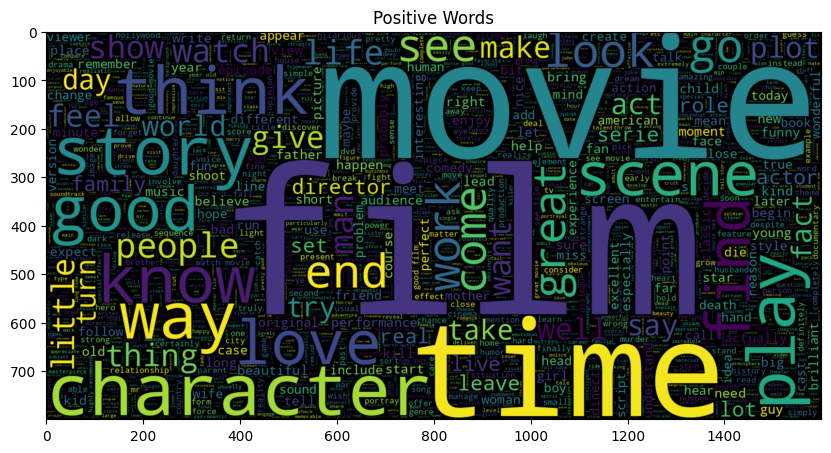

In [ ]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df2[df2.sentiment == 'positive'].review))
plt.title("Positive Words")
plt.imshow(wc , interpolation = 'bilinear')

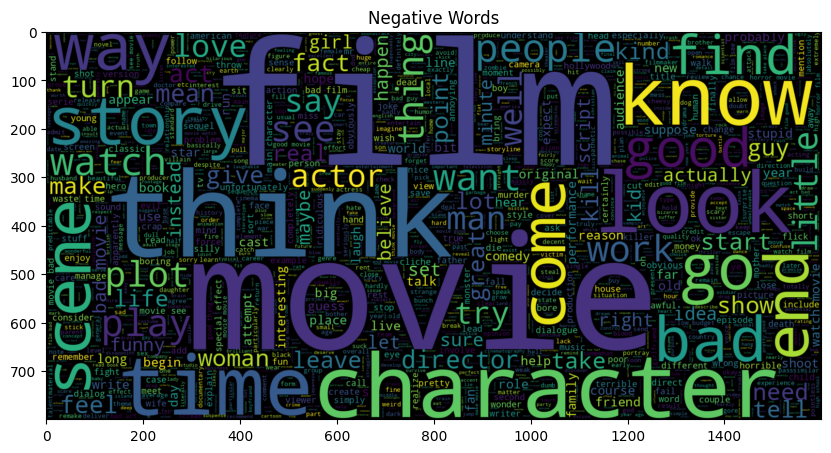

In [ ]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df2[df2.sentiment == 'negative'].review))
plt.title("Negative Words")
plt.imshow(wc , interpolation = 'bilinear')

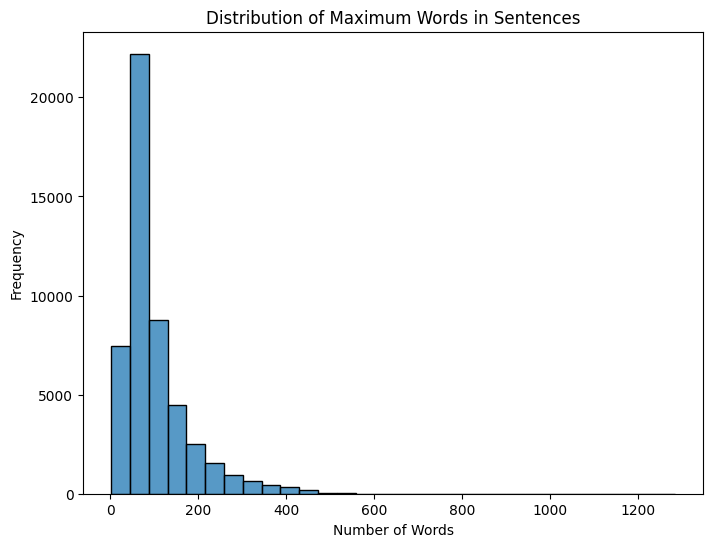

In [ ]:
max_words = df2['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(max_words, bins=30)
plt.title('Distribution of Maximum Words in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df2['sentiment'] = df2['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
X = df2['review']
y = df2['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 39665 39665
Test Data size 9917 9917


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Text(0.5, 1.0, 'Sentiment Field Distribution\n24884\n24698')

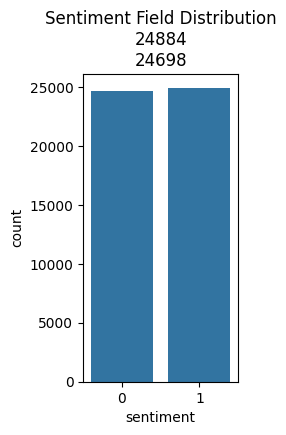

In [ ]:
val_count=df2["sentiment"].value_counts()
plt.figure(figsize= (2,4))
sns.countplot(data = df2, x= 'sentiment')
plt.title(f'Sentiment Field Distribution\n{val_count.to_string(index=False, header=None)}')

In [ ]:
max_len = 200  # Maximum words in each sequence.
batch_size=512
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
print(f"After padding: {X_train.shape}")
print(f"After padding:{X_test.shape}")

After padding: (39665, 200)
After padding:(9917, 200)


In [ ]:
vocab_size=5000
embedding_dim = 100

In [ ]:
model = LogisticRegression(C=1)
model.fit(X_train, y_train)

# Tahmin yapıp  doğruluğu ölçmek:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5087223958858526


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Use TF - IDF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2['review'], df2['sentiment'], test_size=0.2, random_state=42)

In [ ]:

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)




Accuracy: 0.8826257940909549
F1 Score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4939
           1       0.87      0.90      0.89      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



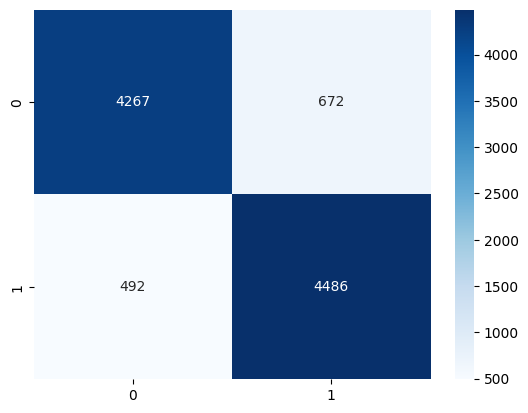

In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.show()

Accuracy: 0.8884743369970757
F1 Score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4939
           1       0.88      0.91      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



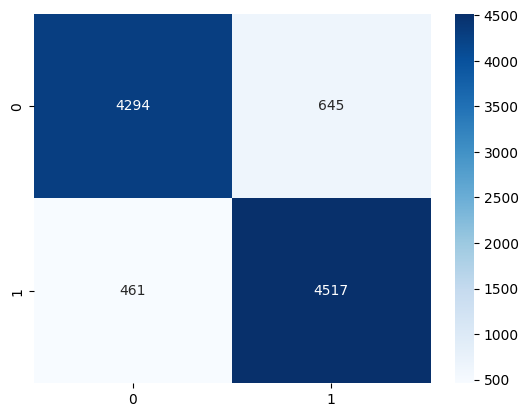

In [ ]:

model = SVC()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.show()

# save model

In [ ]:
pk.dump(model,open('/content/drive/MyDrive/nlp/model.pkl','wb'))
pk.dump(vectorizer,open('/content/drive/MyDrive/nlp/scaler.pkl','wb'))

Accuracy: 0.7015226378945245
F1 Score: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      4939
           1       0.70      0.71      0.70      4978

    accuracy                           0.70      9917
   macro avg       0.70      0.70      0.70      9917
weighted avg       0.70      0.70      0.70      9917



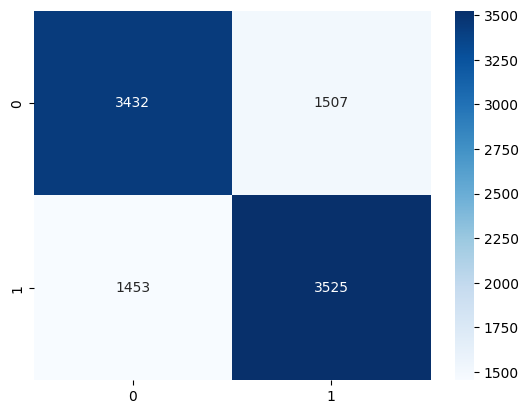

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.show()

Accuracy: 0.8426943632146818
F1 Score: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4939
           1       0.84      0.85      0.84      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



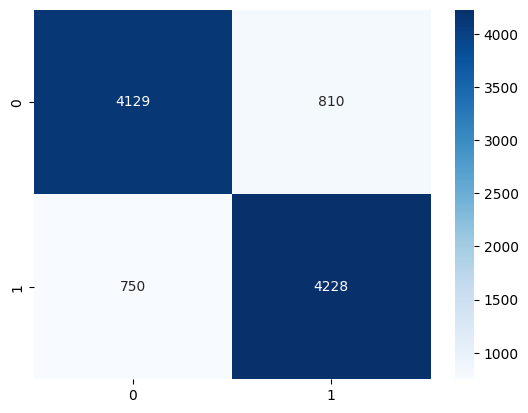

In [ ]:
model =  RandomForestClassifier()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.show()

Accuracy: 0.7901583140062519
F1 Score: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77      4939
           1       0.76      0.86      0.80      4978

    accuracy                           0.79      9917
   macro avg       0.80      0.79      0.79      9917
weighted avg       0.80      0.79      0.79      9917



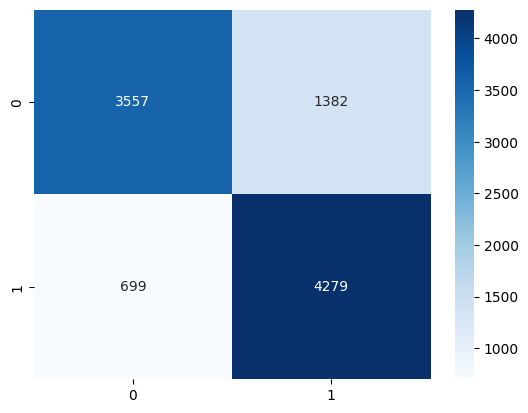

In [ ]:

model = GradientBoostingClassifier()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.show()

In [ ]:
names = ['SVC', 'Logistic Regression', 'RandomForestClassifier', 'Decision Tree', 'GradientBoostingClassifier', 'XG Boost']
models = [SVC(), LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier(), XGBClassifier()]
model_dict = dict(zip(models, names))

In [ ]:
def model_fit(model, X_train_tfidf, y_train):
    model.fit(X_train_tfidf, y_train)
    train_score = roc_auc_score(y_train, model.predict(X_train_tfidf))
    test_score = roc_auc_score(y_test, model.predict(X_test_tfidf))
    return (train_score, test_score)

accuracy_list = []

def model_search_report(X_train_tfidf, y_train):
    # prepare scores
    train_scores = {}
    test_scores = {}
    for model, name in model_dict.items():
        train_score, test_score = model_fit(model, X_train_tfidf, y_train)
        train_scores[name] = train_score
        test_scores[name] = test_score

    # prepare reports
    report = pd.DataFrame()
    report['model'] = names
    report['train_score'] = train_scores.values()
    report['test_score'] = test_scores.values()

    print(report.sort_values(by='test_score'))



In [ ]:
train_scores = {}
test_scores = {}
accuracy_list = []
for model, name in model_dict.items():
        train_score, test_score = model_fit(model, X_train_tfidf, y_train)
        train_scores[name] = train_score
        test_scores[name] = test_score


report = pd.DataFrame()
report['model'] = names
report['train_score'] = train_scores.values()
report['test_score'] = test_scores.values()
print(report.sort_values(by='test_score'))

                        model  train_score  test_score
3               Decision Tree     1.000000    0.698786
4  GradientBoostingClassifier     0.812067    0.789985
5                    XG Boost     0.919905    0.837045
2      RandomForestClassifier     1.000000    0.839032
1         Logistic Regression     0.926446    0.882553
0                         SVC     0.990315    0.888400


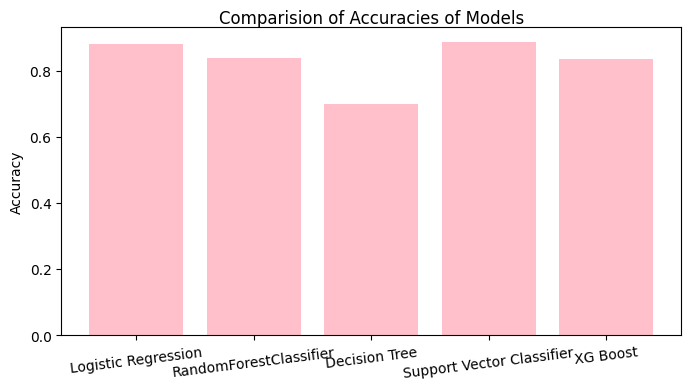

In [ ]:
models = [('Logistic Regression',LogisticRegression()),
          ('RandomForestClassifier',RandomForestClassifier()),
          ('Decision Tree',DecisionTreeClassifier()),
          ('Support Vector Classifier',SVC()),
          ('XG Boost',XGBClassifier())]


accuracy_list = []
for model in models:
    model[1].fit(X_train_tfidf, y_train)
    y_pred = model[1].predict(X_test_tfidf)
    accuracy_list.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
#plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.bar(y_pos, accuracy_list, color='pink')
plt.xticks(y_pos, [x[0] for x in models], rotation=7, fontsize= 10)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models',  fontweight=10,
          pad='2.0')


plt.show()

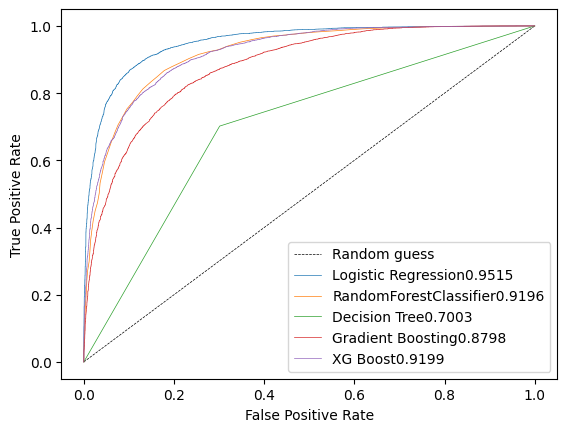

In [ ]:


models = [('Logistic Regression',LogisticRegression()),
          ('RandomForestClassifier',RandomForestClassifier()),
          ('Decision Tree',DecisionTreeClassifier()),
          ("Gradient Boosting",GradientBoostingClassifier()),
          ('XG Boost',XGBClassifier())]
plt.plot([0, 1], [0, 1], 'k--', label='Random guess', linewidth=0.5)
for model in models:
    model[1].fit(X_train_tfidf, y_train)
    y_pred = model[1].predict_proba(X_test_tfidf)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    model_names = [x[0] for x in models]
    plt.plot(fpr,tpr,label= model[0]+str(auc), linewidth=0.5)
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    plt.legend()